In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

In [3]:
x = pd.read_csv('/Users/okayush/Downloads/dataset and all/training_set_features.csv')
xtest=pd.read_csv('/Users/okayush/Downloads/dataset and all/test_set_features.csv')
y=pd.read_csv('/Users/okayush/Downloads/dataset and all/training_set_labels.csv')


In [5]:
x.head()

,respondent_id,xyz_concern,xyz_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,Below Poverty,Not Married,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,NaN,NaN
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,Below Poverty,Not Married,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,"<= $75,000, Above Poverty",Not Married,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,rucpziij,xtkaffoo
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,Below Poverty,Not Married,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,NaN,NaN
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,"<= $75,000, Above Poverty",Married,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,wxleyezf,emcorrxb


In [79]:
x.columns

Index(['xyz_concern', 'xyz_knowledge', 'behavioral_antiviral_meds',
       'behavioral_avoidance', 'behavioral_face_mask', 'behavioral_wash_hands',
       'behavioral_large_gatherings', 'behavioral_outside_home',
       'behavioral_touch_face', 'doctor_recc_xyz', 'doctor_recc_seasonal',
       'chronic_med_condition', 'child_under_6_months', 'health_worker',
       'opinion_xyz_vacc_effective', 'opinion_xyz_risk',
       'opinion_xyz_sick_from_vacc', 'opinion_seas_vacc_effective',
       'opinion_seas_risk', 'opinion_seas_sick_from_vacc', 'age_group', 'race',
       'sex', 'household_adults', 'household_children'],
      dtype='object')

### finding number of null values in dataset

In [7]:
x.isnull().mean()*100

respondent_id                   0.000000
xyz_concern                     0.344479
xyz_knowledge                   0.434343
behavioral_antiviral_meds       0.265848
behavioral_avoidance            0.778822
behavioral_face_mask            0.071142
behavioral_wash_hands           0.157262
behavioral_large_gatherings     0.325757
behavioral_outside_home         0.307036
behavioral_touch_face           0.479275
doctor_recc_xyz                 8.087767
doctor_recc_seasonal            8.087767
chronic_med_condition           3.635751
child_under_6_months            3.070356
health_worker                   3.010447
health_insurance               45.957989
opinion_xyz_vacc_effective      1.464036
opinion_xyz_risk                1.452803
opinion_xyz_sick_from_vacc      1.479013
opinion_seas_vacc_effective     1.729884
opinion_seas_risk               1.924589
opinion_seas_sick_from_vacc     2.010709
age_group                       0.000000
education                       5.268282
race            

## droping columns with irrelevent information and which having NAN values > 5%

In [9]:

x.drop(['employment_industry','employment_occupation','hhs_geo_region','census_msa','health_insurance','education',
              'income_poverty','marital_status','rent_or_own','employment_status',],axis=1,inplace = True)

In [11]:
x.drop(['respondent_id'],axis=1,inplace = True)

In [13]:
x.isnull().mean()*100

xyz_concern                    0.344479
xyz_knowledge                  0.434343
behavioral_antiviral_meds      0.265848
behavioral_avoidance           0.778822
behavioral_face_mask           0.071142
behavioral_wash_hands          0.157262
behavioral_large_gatherings    0.325757
behavioral_outside_home        0.307036
behavioral_touch_face          0.479275
doctor_recc_xyz                8.087767
doctor_recc_seasonal           8.087767
chronic_med_condition          3.635751
child_under_6_months           3.070356
health_worker                  3.010447
opinion_xyz_vacc_effective     1.464036
opinion_xyz_risk               1.452803
opinion_xyz_sick_from_vacc     1.479013
opinion_seas_vacc_effective    1.729884
opinion_seas_risk              1.924589
opinion_seas_sick_from_vacc    2.010709
age_group                      0.000000
race                           0.000000
sex                            0.000000
household_adults               0.932340
household_children             0.932340


In [15]:
x.head()

,xyz_concern,xyz_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_xyz,...,opinion_xyz_risk,opinion_xyz_sick_from_vacc,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,age_group,race,sex,household_adults,household_children
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,1.0,2.0,2.0,1.0,2.0,55 - 64 Years,White,Female,0.0,0.0
1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,...,4.0,4.0,4.0,2.0,4.0,35 - 44 Years,White,Male,0.0,0.0
2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,...,1.0,1.0,4.0,1.0,2.0,18 - 34 Years,White,Male,2.0,0.0
3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,...,3.0,5.0,5.0,4.0,1.0,65+ Years,White,Female,0.0,0.0
4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,...,3.0,2.0,3.0,1.0,4.0,45 - 54 Years,White,Female,1.0,0.0


In [17]:
x.columns,


(Index(['xyz_concern', 'xyz_knowledge', 'behavioral_antiviral_meds',
        'behavioral_avoidance', 'behavioral_face_mask', 'behavioral_wash_hands',
        'behavioral_large_gatherings', 'behavioral_outside_home',
        'behavioral_touch_face', 'doctor_recc_xyz', 'doctor_recc_seasonal',
        'chronic_med_condition', 'child_under_6_months', 'health_worker',
        'opinion_xyz_vacc_effective', 'opinion_xyz_risk',
        'opinion_xyz_sick_from_vacc', 'opinion_seas_vacc_effective',
        'opinion_seas_risk', 'opinion_seas_sick_from_vacc', 'age_group', 'race',
        'sex', 'household_adults', 'household_children'],
       dtype='object'),)

In [19]:
x.age_group.value_counts()

age_group
65+ Years        6843
55 - 64 Years    5563
45 - 54 Years    5238
18 - 34 Years    5215
35 - 44 Years    3848
Name: count, dtype: int64

## filling missing values by most frequent and mean according particular column

In [21]:

from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline,make_pipeline
from sklearn.preprocessing import OrdinalEncoder


In [23]:

ordinal_order = ['18 - 34 Years','35 - 44 Years','45 - 54 Years','55 - 64 Years','65+ Years']

# Initialize ColumnTransformer 
preprocessor = ColumnTransformer(
    transformers=[
        ('freq_imputer', SimpleImputer(strategy='most_frequent'), [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,23,24]),  # Impute ordinal and nominal columns with most frequent value
        ('ordinal_encoder', OrdinalEncoder(categories=[ordinal_order]), ['age_group']),  # Ordinal encoding for ordinal column
        ('onehot_encoder', OneHotEncoder(drop='first',sparse=False,dtype=np.int32), ['race','sex'])  # One-hot encoding for nominal column
    ],
    remainder='passthrough')
                                

In [25]:
x_new = preprocessor.fit_transform(x)



/opt/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [27]:
x_new = pd.DataFrame(x_new)

In [29]:
x_new

,0,1,2,3,4,5,6,7,8,9,...,17,18,19,20,21,22,23,24,25,26
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,2.0,1.0,2.0,0.0,0.0,3.0,0.0,0.0,1.0,0.0
1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,...,4.0,2.0,4.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0
2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,4.0,1.0,2.0,2.0,0.0,0.0,0.0,0.0,1.0,1.0
3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,...,5.0,4.0,1.0,0.0,0.0,4.0,0.0,0.0,1.0,0.0
4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,...,3.0,1.0,4.0,1.0,0.0,2.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26702,2.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,5.0,2.0,2.0,0.0,0.0,4.0,0.0,0.0,1.0,0.0
26703,1.0,2.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,...,5.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0
26704,2.0,2.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,...,5.0,4.0,2.0,0.0,0.0,3.0,0.0,0.0,1.0,0.0
26705,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,2.0,1.0,2.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0


In [31]:
x_new.isnull().mean()*100

0     0.0
1     0.0
2     0.0
3     0.0
4     0.0
5     0.0
6     0.0
7     0.0
8     0.0
9     0.0
10    0.0
11    0.0
12    0.0
13    0.0
14    0.0
15    0.0
16    0.0
17    0.0
18    0.0
19    0.0
20    0.0
21    0.0
22    0.0
23    0.0
24    0.0
25    0.0
26    0.0
dtype: float64

In [39]:
y.head()

,respondent_id,xyz_vaccine,seasonal_vaccine
0,0,0,0
1,1,0,1
2,2,0,0
3,3,0,1
4,4,0,0


In [43]:
y.drop('respondent_id',axis=1,inplace = True)

In [45]:
y1 = y.iloc[:,0]
y2 = y.iloc[:,1]


In [47]:
y1.head()

0    0
1    0
2    0
3    0
4    0
Name: xyz_vaccine, dtype: int64

### for xyz_vaccine

## writing a code for training dataset


In [49]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, roc_curve, accuracy_score
import matplotlib.pyplot as plt

In [51]:
X_train, X_test, y_train, y_test = train_test_split(x_new, y1, test_size=0.2, random_state=42)


In [185]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [187]:
# Predict probabilities
y_prob = model.predict_proba(X_test)[:, 1]


In [189]:
y_pred = model.predict(X_test)

In [191]:
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

Accuracy: 0.7836016473231


In [193]:
roc_auc = roc_auc_score(y_test, y_prob)
print(f'ROC AUC: {roc_auc}')

ROC AUC: 0.8484868627450151


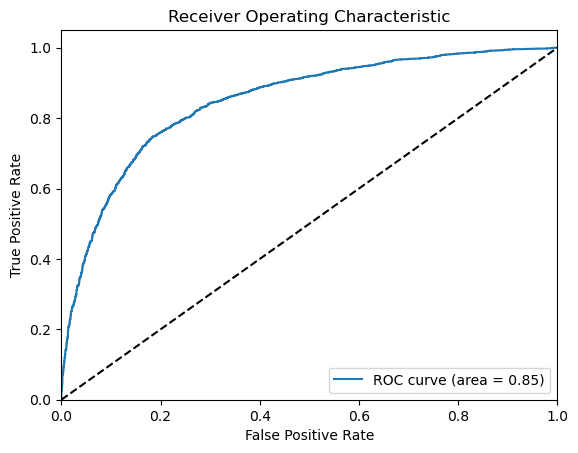

In [195]:
fpr, tpr, _ = roc_curve(y_test, y_prob)
plt.plot(fpr, tpr, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

### for seasonal vaccine

In [135]:
X_train, X_test, y_train, y_test = train_test_split(x_new, y2, test_size=0.2, random_state=42)


In [171]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [173]:
y_prob = model.predict_proba(X_test)[:, 1]



In [175]:
y_prob

array([0.14964271, 0.14751525, 0.82625893, ..., 0.56546286, 0.54321942,
       0.67687632])

In [177]:
y_pred = model.predict(X_test)

In [179]:
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

Accuracy: 0.7836016473231


In [181]:
roc_auc = roc_auc_score(y_test, y_prob)
print(f'ROC AUC: {roc_auc}')

ROC AUC: 0.8484868627450151


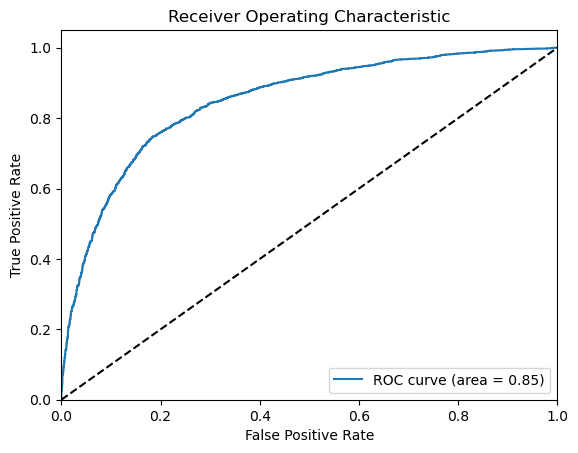

In [183]:
fpr, tpr, _ = roc_curve(y_test, y_prob)
plt.plot(fpr, tpr, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [81]:


## applying the same concept after performing pca

In [113]:
from sklearn.decomposition import PCA
pca = PCA(n_components=18)
x_new15 = pca.fit_transform(x_new)


In [115]:
X_train, X_test, y_train, y_test = train_test_split(x_new15, y2, test_size=0.2, random_state=42)

In [117]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [119]:
y_prob = model.predict_proba(X_test)[:, 1]

In [121]:
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

Accuracy: 0.7733058779483339
